# Revised Project Proposal

---
Students: 

- Tailine, DC427182
- Zhong Wanyi, DC229805

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data
crimes = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crimes.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
982633,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066
982634,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
982635,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
982636,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868
982637,240910892,08/13/2024 12:00:00 AM,08/12/2024 12:00:00 AM,2300,9,Van Nuys,914,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,6900 VESPER AV,NaN,34.1961,-118.4510


In [70]:
# dataset variables
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [71]:
# count values of 'weapon description'
pd.set_option('display.max_rows', None)
crimes['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174413
UNKNOWN WEAPON/OTHER WEAPON                        35945
VERBAL THREAT                                      23802
HAND GUN                                           20107
SEMI-AUTOMATIC PISTOL                               7246
KNIFE WITH BLADE 6INCHES OR LESS                    6824
UNKNOWN FIREARM                                     6568
OTHER KNIFE                                         5874
MACE/PEPPER SPRAY                                   3728
VEHICLE                                             3243
ROCK/THROWN OBJECT                                  2731
PIPE/METAL PIPE                                     2464
BOTTLE                                              2412
FOLDING KNIFE                                       2260
STICK                                               2246
CLUB/BAT                                            2087
KITCHEN KNIFE                                       1918
AIR PISTOL/REVOLVER

In [72]:
# cleaning data
crimes = crimes[crimes['Vict Age'] > 0]
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463


In [73]:
# filtering the data to answer research question

# Create a binary/dummy variables
crimes['VerbalThreat'] = crimes['Weapon Desc'].apply(lambda x: 1 if x == 'VERBAL THREAT' else 0)
crimes = crimes[crimes["Vict Sex"].isin(["M", "F"])]
crimes['Vict Sex Encoded'] = crimes['Vict Sex'].apply(lambda x: 1 if x == 'M' else 0)

crimes['VerbalThreat'].value_counts()

VerbalThreat
0    690756
1     21968
Name: count, dtype: int64

In [ ]:
verbal = crimes[crimes['VerbalThreat'] == 1]
verbal.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,VerbalThreat,Vict Sex Encoded
35,211220472,09/27/2021 12:00:00 AM,11/26/2020 12:00:00 AM,2000,12,77th Street,1259,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,930.0,NaN,NaN,NaN,7800 S SAN PEDRO ST,NaN,33.9679,-118.2695,1,0
119,231315967,08/21/2023 12:00:00 AM,01/01/2020 12:00:00 AM,1530,13,Newton,1362,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,812.0,813.0,NaN,NaN,4800 S SAN PEDRO ST,NaN,33.9994,-118.2696,1,0
126,221609983,06/30/2022 12:00:00 AM,08/01/2020 12:00:00 AM,1200,16,Foothill,1668,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,930.0,NaN,NaN,NaN,9700 PINEWOOD AV,NaN,34.2452,-118.2855,1,0
214,231506571,03/03/2023 12:00:00 AM,07/15/2020 12:00:00 AM,1700,15,N Hollywood,1532,2,946,OTHER MISCELLANEOUS CRIME,...,946.0,NaN,NaN,NaN,12300 EMELITA ST,NaN,34.1763,-118.4013,1,0
240,211313647,08/02/2021 12:00:00 AM,10/22/2020 12:00:00 AM,800,13,Newton,1391,2,928,THREATENING PHONE CALLS/LETTERS,...,928.0,NaN,NaN,NaN,300 W 70TH ST,NaN,33.9765,-118.2789,1,0


In [ ]:
verbal['Crm Cd Desc'].value_counts()

Crm Cd Desc
CRIMINAL THREATS - NO WEAPON DISPLAYED                      16862
BRANDISH WEAPON                                              1121
ROBBERY                                                       784
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                       426
THREATENING PHONE CALLS/LETTERS                               380
EXTORTION                                                     303
VIOLATION OF RESTRAINING ORDER                                215
OTHER MISCELLANEOUS CRIME                                     192
DISTURBING THE PEACE                                          184
BATTERY - SIMPLE ASSAULT                                      178
STALKING                                                      177
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                164
ATTEMPTED ROBBERY                                             159
VIOLATION OF COURT ORDER                                      111
INTIMATE PARTNER - SIMPLE ASSAULT                              6

In [88]:
# if the crime has the word "weapon" in the description, it is considered a weapon crime, so we classify it as 0 on the 'VerbalThreat' column of "crimes" dataframe
verbal['Weapon'] = crimes['Crm Cd Desc'].apply(lambda x: 1 if 'WEAPON' in x else 0)

# remove the rows where the crime is a weapon crime
verbal = verbal[verbal['Weapon'] == 0]

C:\Users\User\AppData\Local\Temp\ipykernel_15488\1031465559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verbal['Weapon'] = crimes['Crm Cd Desc'].apply(lambda x: 1 if 'WEAPON' in x else 0)


In [89]:
# check the crimes again
verbal['Crm Cd Desc'].value_counts()

Crm Cd Desc
ROBBERY                                                     784
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                     426
THREATENING PHONE CALLS/LETTERS                             380
EXTORTION                                                   303
VIOLATION OF RESTRAINING ORDER                              215
OTHER MISCELLANEOUS CRIME                                   192
DISTURBING THE PEACE                                        184
BATTERY - SIMPLE ASSAULT                                    178
STALKING                                                    177
ATTEMPTED ROBBERY                                           159
VIOLATION OF COURT ORDER                                    111
INTIMATE PARTNER - SIMPLE ASSAULT                            69
CONTEMPT OF COURT                                            58
BOMB SCARE                                                   50
OTHER ASSAULT                                                45
INTIMATE PARTNER - AGGRAVATE

In [90]:
verbal['Vict Age'].value_counts().sort_index()

Vict Age
2       4
3       1
4       3
5       2
6       3
7       1
8       3
9       3
10      6
11     10
12     20
13     34
14     48
15     41
16     55
17     48
18     45
19     64
20     80
21     74
22     91
23    102
24    108
25     90
26     84
27    120
28    109
29    125
30    123
31     96
32    104
33    102
34    112
35    115
36    102
37     69
38     85
39     73
40     91
41     70
42     50
43     85
44     62
45     53
46     51
47     63
48     58
49     63
50     68
51     42
52     51
53     39
54     52
55     59
56     50
57     40
58     38
59     52
60     42
61     30
62     29
63     22
64     23
65     21
66     18
67     25
68     15
69     11
70     10
71     15
72     12
73     12
74      9
75      3
76      3
77      8
78      2
79      4
80      1
81      1
82      1
83      1
84      3
85      2
87      2
91      1
97      1
99      2
Name: count, dtype: int64

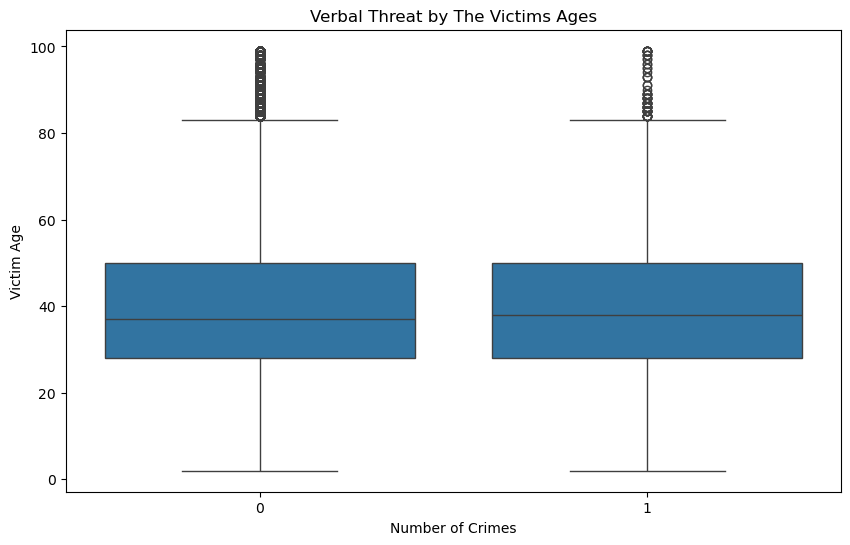

In [91]:
# age distribution of the victims by non-use of strong-arm
plt.figure(figsize=(10, 6))
sns.boxplot(x='VerbalThreat', y='Vict Age', data=crimes)
plt.title('Verbal Threat by The Victims Ages')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Age')
plt.show()

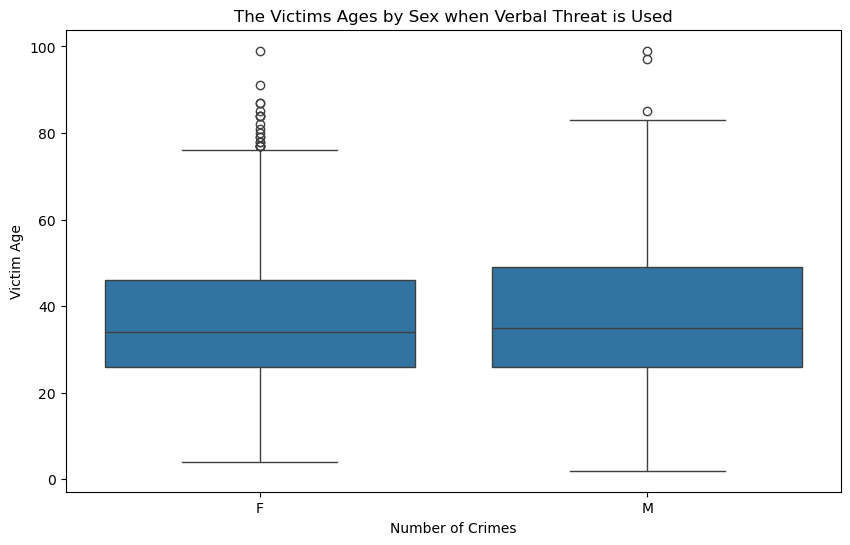

In [92]:
# age distribution of the victims by use of strong-arm and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vict Sex', y='Vict Age', data=verbal)
plt.title('The Victims Ages by Sex when Verbal Threat is Used')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Age')
plt.show()

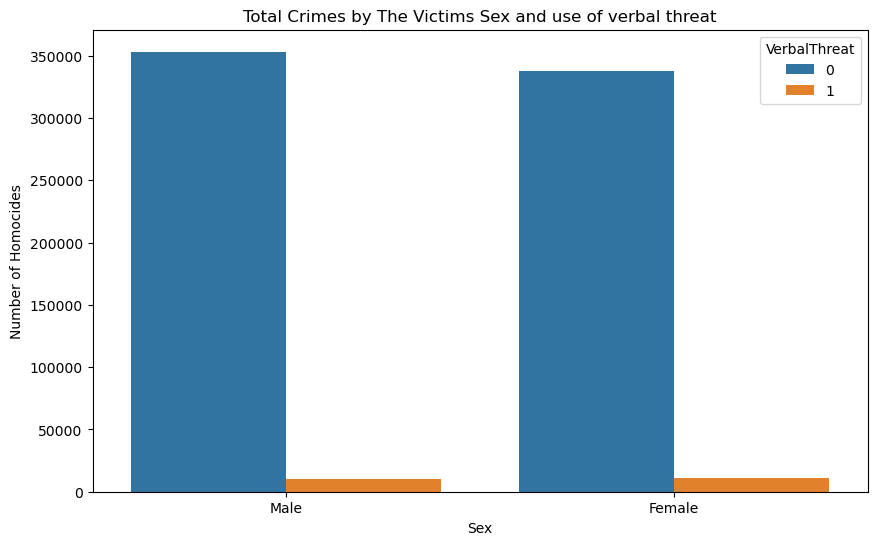

In [93]:
# gender distribution of the victims
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes, x="Vict Sex", hue="VerbalThreat")
plt.xticks(ticks=['M','F'], labels=['Male', 'Female'])
plt.title('Total Crimes by The Victims Sex and use of verbal threat')
plt.xlabel('Sex')
plt.ylabel('Number of Homocides')
plt.show()

In [94]:
mean_victim_ages_by_gender = verbal.groupby(['Crm Cd Desc', 'Vict Sex'])['Vict Age'].mean().reset_index()

print(mean_victim_ages_by_gender.sort_values(by=['Crm Cd Desc', 'Vict Sex']).to_markdown(index=False))

| Crm Cd Desc                                              | Vict Sex   |   Vict Age |
|:---------------------------------------------------------|:-----------|-----------:|
| ARSON                                                    | F          |   59       |
| ARSON                                                    | M          |   58.3333  |
| ATTEMPTED ROBBERY                                        | F          |   38.8958  |
| ATTEMPTED ROBBERY                                        | M          |   36.3874  |
| BATTERY - SIMPLE ASSAULT                                 | F          |   46.0641  |
| BATTERY - SIMPLE ASSAULT                                 | M          |   38.59    |
| BATTERY POLICE (SIMPLE)                                  | M          |   19       |
| BATTERY WITH SEXUAL CONTACT                              | F          |   33.6     |
| BATTERY WITH SEXUAL CONTACT                              | M          |   28.5     |
| BOMB SCARE                               

In [95]:
# correlation between the crime being a verbalthreat and the age of the victims
correlation_age = crimes['VerbalThreat'].corr(crimes['Vict Age'])
print(f"Correlation between crime being a verbal threat and victim age: {correlation_age}")

Correlation between crime being a verbal threat and victim age: -0.000428761291308239


In [96]:
# correlation between the crime being a verbal threat and the gender of the victims
correlation_gender = crimes['VerbalThreat'].corr(crimes['Vict Sex Encoded'])
print(f"Correlation between crime being a verbal threat and victim gender: {correlation_gender}")

Correlation between crime being a verbal threat and victim gender: -0.00978054630196017
